#Python para Investimentos



Link para o vídeo: https://youtu.be/d2qrsCfXung

**Python para Investimentos** é um conjunto de códigos e vídeos em que mostro como utilizar a linguagem de programação PYTHON através da ferramenta online Google Colab para fazer estudos no mercado financeiro.

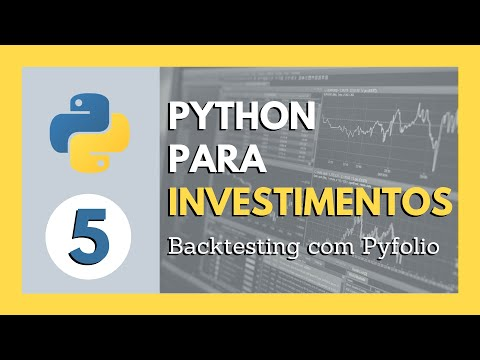

In [1]:
#@title Vídeo
from IPython.display import YouTubeVideo
YouTubeVideo('d2qrsCfXung', width=854, height=480)

# 1. Importando bibliotecas

In [2]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

Requirement already up-to-date: yfinance in f:\anaconda\lib\site-packages (0.1.54)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio


  Cloning https://github.com/quantopian/pyfolio to c:\users\reiss\appdata\local\temp\pip-req-build-huk4vpqp
  Using cached empyrical-0.5.3.tar.gz (50 kB)
  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)
  Created wheel for pyfolio: filename=pyfolio-0.9.2+74.gecc8308-py3-none-any.whl size=76265 sha256=cc5872d0e7fc5f2563e04c7d7ba57d9b0b78ac4ae58d59988e59d919f6329090
  Stored in directory: C:\Users\Reiss\AppData\Local\Temp\pip-ephem-wheel-cache-5rqah6ji\wheels\2d\aa\24\c99ed55ef37c69e33815248c1622cdb81b65ec753868004c28
  Created wheel for empyrical: filename=empyrical-0.5.3-py3-none-any.whl size=37105 sha256=33389e5ce7502ce3b50e89daea4295b9dcf932e0d5c3f77fbede1fd102acbe0e
  Stored in directory: c:\users\reiss\appdata\local\pip\cache\wheels\14\37\00\4e984eafe752f6df04a3b6c31c7ef42a0e9c5173ca5f2156d2
Successfully built pyfolio empyrical


In [5]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

# 2. Obtendo e tratando os dados

In [6]:
#tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']


[*********************100%***********************]  6 of 6 completed


In [7]:
dados_yahoo

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-07-10,16.930479,5.239339,3.976803,14.948427,13.534282,52591.0
2015-07-13,17.026329,5.245173,4.199893,16.162821,13.582692,53119.0
2015-07-14,17.122177,5.245173,4.141695,15.568727,13.644840,53239.0
2015-07-15,17.209314,5.210167,4.170794,14.948427,13.637928,52902.0
2015-07-16,17.191889,5.210167,4.025301,15.411469,13.672505,53070.0
...,...,...,...,...,...,...
2020-07-06,14.360000,10.360000,7.610000,56.570000,53.200001,98937.0
2020-07-07,14.450000,9.990000,7.450000,56.369999,53.910000,97761.0
2020-07-08,14.710000,10.170000,7.700000,57.320000,54.299999,99770.0


In [8]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-07-10,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-13,0.005661,0.001113,0.056098,0.081239,0.003577,0.010040
2015-07-14,0.005629,0.000000,-0.013857,-0.036757,0.004576,0.002259
2015-07-15,0.005089,-0.006674,0.007026,-0.039843,-0.000507,-0.006330
2015-07-16,-0.001013,0.000000,-0.034884,0.030976,0.002535,0.003176
...,...,...,...,...,...,...
2020-07-06,0.015559,0.039117,0.020107,0.023706,-0.014815,0.022446
2020-07-07,0.006267,-0.035714,-0.021025,-0.003535,0.013346,-0.011886
2020-07-08,0.017993,0.018018,0.033557,0.016853,0.007234,0.020550


In [9]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-07-10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-07-13,1.005661,1.001113,1.056098,1.081239,1.003577,1.010040
2015-07-14,1.011323,1.001113,1.041463,1.041496,1.008169,1.012321
2015-07-15,1.016469,0.994432,1.048781,1.000000,1.007658,1.005914
2015-07-16,1.015440,0.994432,1.012195,1.030976,1.010213,1.009108
...,...,...,...,...,...,...
2020-07-06,0.848174,1.977348,1.913597,3.784345,3.930759,1.881253
2020-07-07,0.853490,1.906729,1.873364,3.770965,3.983218,1.858892
2020-07-08,0.868847,1.941084,1.936228,3.834517,4.012034,1.897093


In [10]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2015-07-10,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2015-07-13,10056.613868,10011.134277,10560.976244,10812.388888,10035.768736,51476.882015,0.029538
2015-07-14,10113.226610,10011.134277,10414.633833,10414.960239,10081.687756,51035.642716,-0.008572
2015-07-15,10164.694275,9944.320422,10487.805638,10000.000000,10076.580553,50673.400888,-0.007098
2015-07-16,10154.401868,9944.320422,10121.952609,10309.759852,10102.128544,50632.563294,-0.000806
...,...,...,...,...,...,...,...
2020-07-06,8481.744441,19773.484711,19135.973178,37843.445960,39307.590770,124542.239060,0.012493
2020-07-07,8534.903098,19067.289024,18733.639162,37709.652110,39832.183872,123877.667266,-0.005336
2020-07-08,8688.472426,19410.844371,19362.284788,38345.170985,40120.340568,125927.113137,0.016544


# 3. Resultados

Start date,2015-07-10
End date,2020-07-10
Total months,59
,Backtest
Annual return,20.495%
Cumulative returns,151.014%
Annual volatility,31.034%
Sharpe ratio,0.76
Calmar ratio,0.51
Stability,0.84
Max drawdown,-39.894%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.89,2015-07-13,2016-01-18,2016-08-15,286
1,39.06,2020-01-23,2020-03-23,NaT,NaN
2,21.69,2018-02-26,2018-06-21,2019-03-19,277
3,15.93,2017-02-21,2017-04-13,2017-08-07,120
4,14.79,2019-07-10,2019-08-26,2019-11-22,98


Stress Events,mean,min,max
Fall2015,-0.13%,-4.75%,4.82%
New Normal,0.09%,-13.81%,12.62%


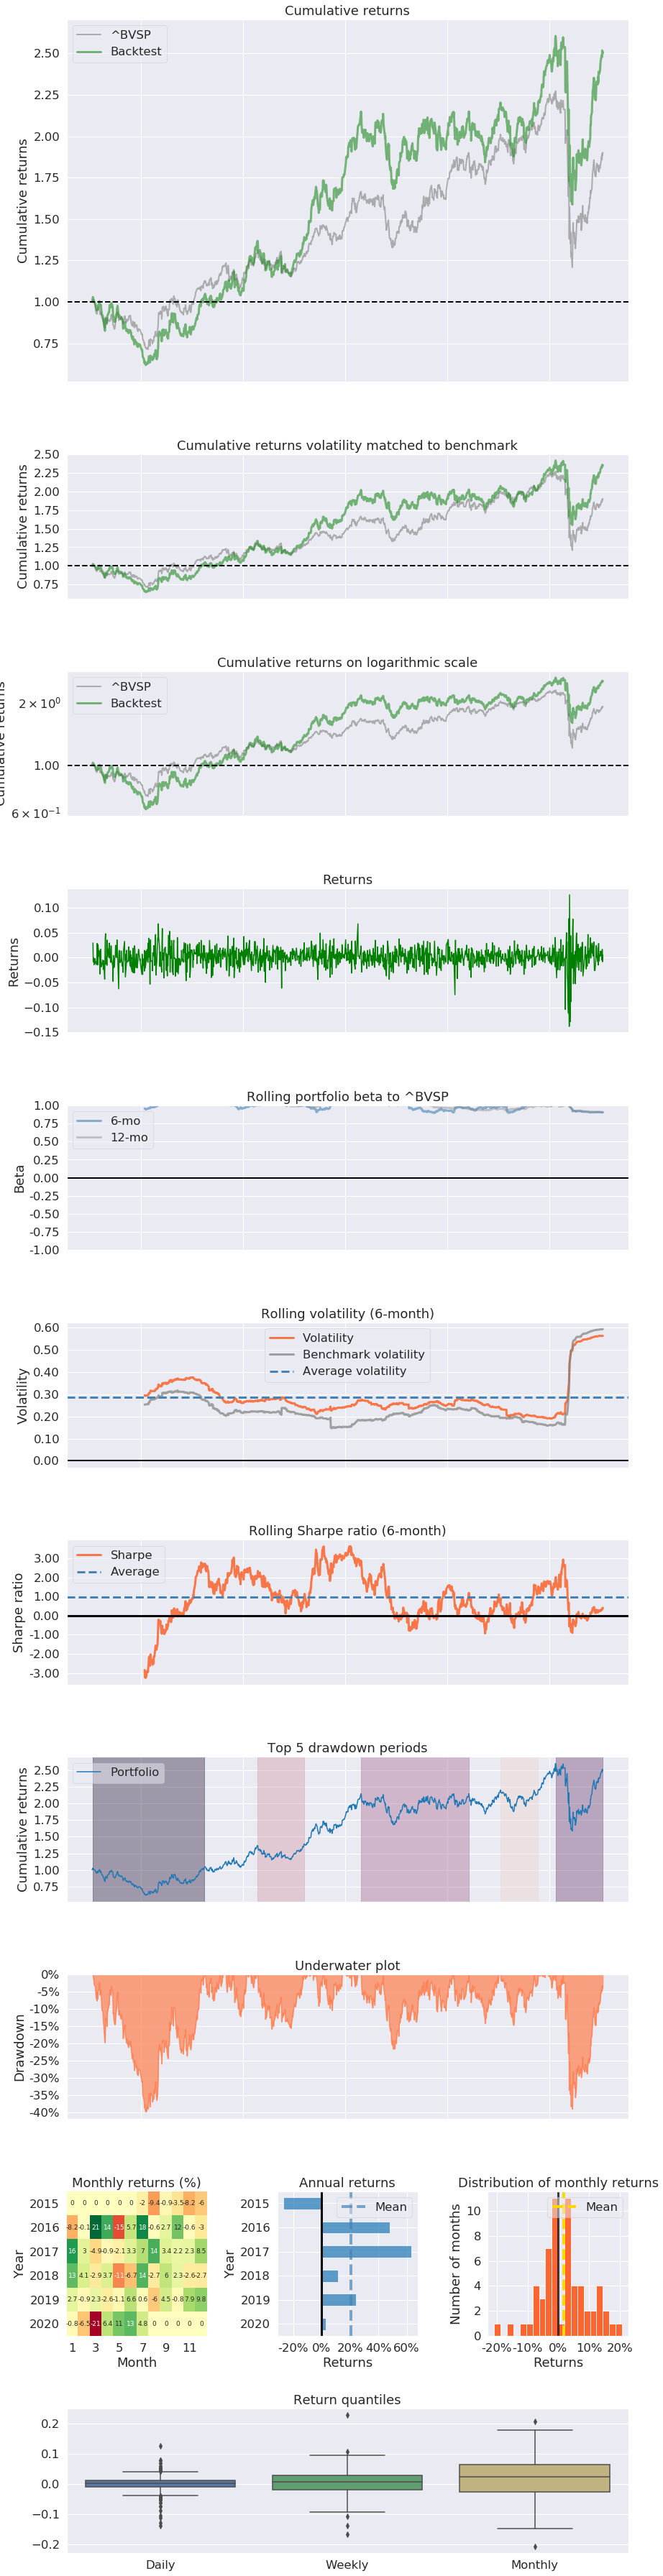

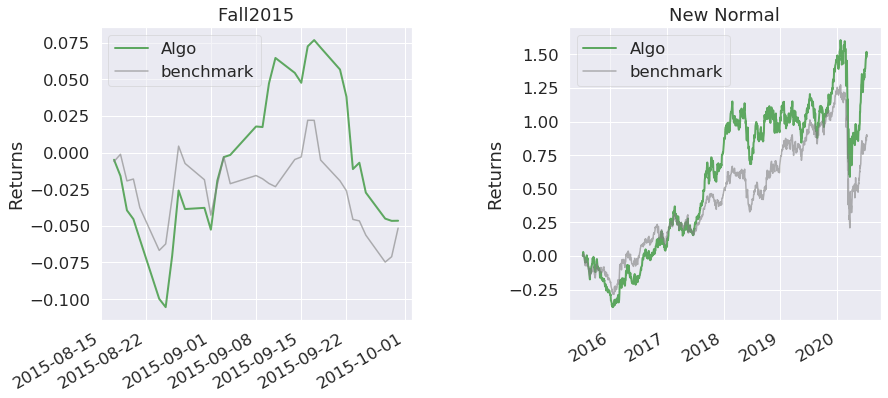

In [11]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])


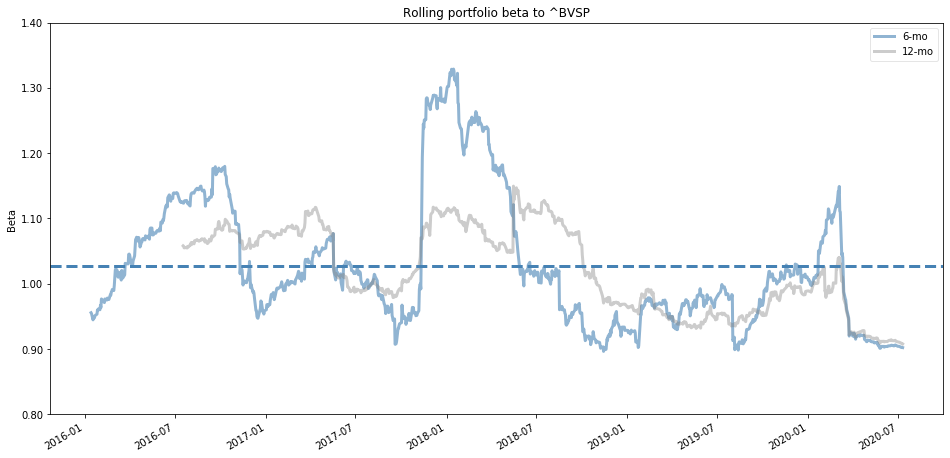

In [12]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4));